# Goal of UDS Analysis:  
Determine Possible Sequence Length for Cognitive Trajectory Prediction


C:\Users\Andrew\AppData\Local\Temp\ipykernel_5136\1954791759.py:5: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('uds.csv')


Numeric counts of the highest NACCVNUM obtained:
NACCVNUM
1     16866
2      9262
3      6307
4      4869
5      3599
6      2865
7      2200
8      1442
9      1183
10      963
11      825
12      634
13      473
14      351
15      265
16      193
17      144
18       71
19       24
20        1
Name: count, dtype: int64


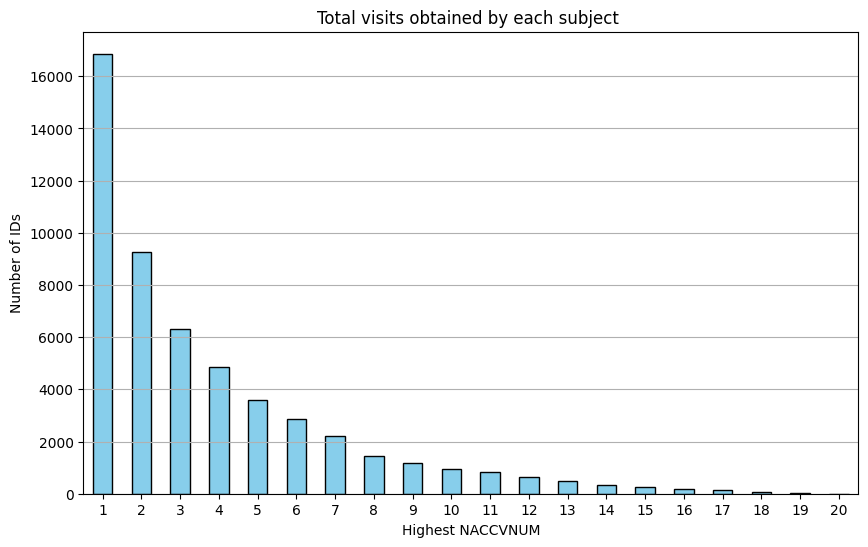

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
df = pd.read_csv('uds.csv')

id = 'NACCID'
num_visits = 'NACCVNUM'

max_visits = df.groupby(id)[num_visits].max()
naccvnum_counts = max_visits.value_counts()

print("Numeric counts of the highest NACCVNUM obtained:")
print(naccvnum_counts)

# Create a histogram
plt.figure(figsize=(10, 6))
naccvnum_counts.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Highest NACCVNUM')
plt.ylabel('Number of IDs')
plt.title('Total visits obtained by each subject ')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Filter IDs that obtained up to 10 NACCVNUM
ids_with_10_visits = max_visits[max_visits == 10].index

# Create a new DataFrame with rows for these IDs
df_with_10_visits = df[df[id].isin(ids_with_10_visits)]

# Save the filtered DataFrame to a new CSV file
df_with_10_visits.to_csv('10_visits.csv', index=False)

10 Visit Cohort Analysis

C:\Users\Andrew\AppData\Local\Temp\ipykernel_5136\964514020.py:1: DtypeWarning: Columns (22,24,28,41,44,46,51,61,63,65,67,69,71,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,179,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,397,399,401,421,423,432,445,454,494,574,605,613,638,674,690,707,710,727,738,744,831,833,835,837,843,904,959,960,961,969,970,971) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('10_visits.csv')
C:\Users\Andrew\AppData\Local\Temp\ipykernel_5136\964514020.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Participant ID', bbox_to_anchor=(1.05, 1), loc='upper left')


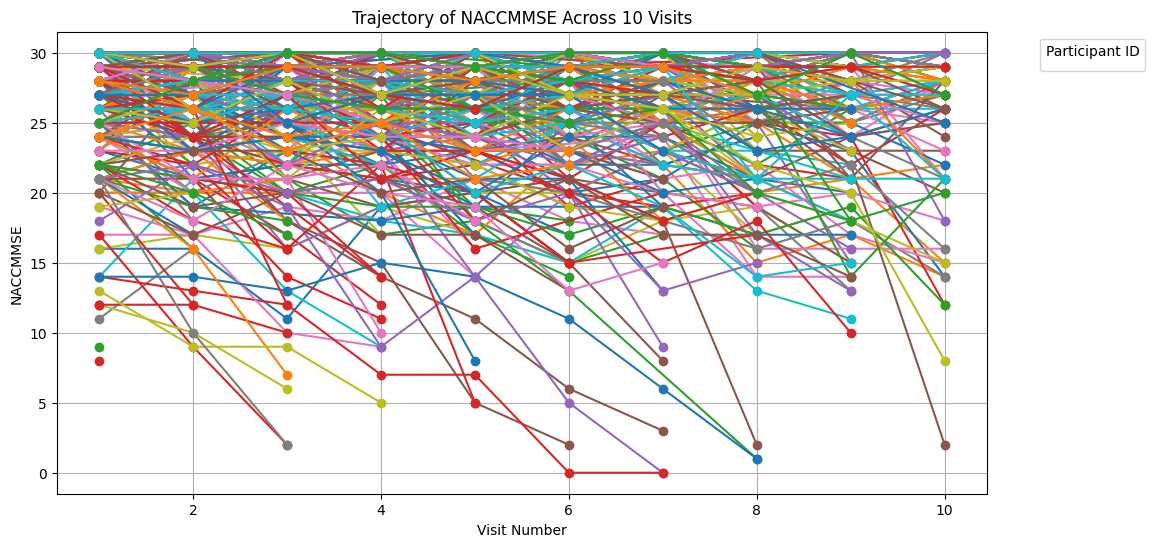

In [ ]:
df = pd.read_csv('10_visits.csv')

id = 'NACCID'
num_visits = 'NACCVNUM'
nacc_moca_score = 'NACCMMSE'


df_filtered = df[(df[nacc_moca_score] >= 0) & (df[nacc_moca_score] <= 30) ]
df_with_10_visits = df_filtered.sort_values(by=[id, num_visits])

plt.figure(figsize=(12, 6))
for participant_id in ids_with_10_visits:
    participant_data = df_with_10_visits[df_with_10_visits[id] == participant_id]
    plt.plot(participant_data[num_visits], participant_data[nacc_moca_score], marker='o')

plt.xlabel('Visit Number')
plt.ylabel('NACCMMSE')
plt.title('Trajectory of NACCMMSE Across 10 Visits')
plt.legend(title='Participant ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

C:\Users\Andrew\AppData\Local\Temp\ipykernel_5136\31747478.py:1: DtypeWarning: Columns (22,24,28,41,44,46,51,61,63,65,67,69,71,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,179,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,397,399,401,421,423,432,445,454,494,574,605,613,638,674,690,707,710,727,738,744,831,833,835,837,843,904,959,960,961,969,970,971) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('10_visits.csv')
C:\Users\Andrew\AppData\Local\Temp\ipykernel_5136\31747478.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Participant ID', bbox_to_anchor=(1.05, 1), loc='upper left')


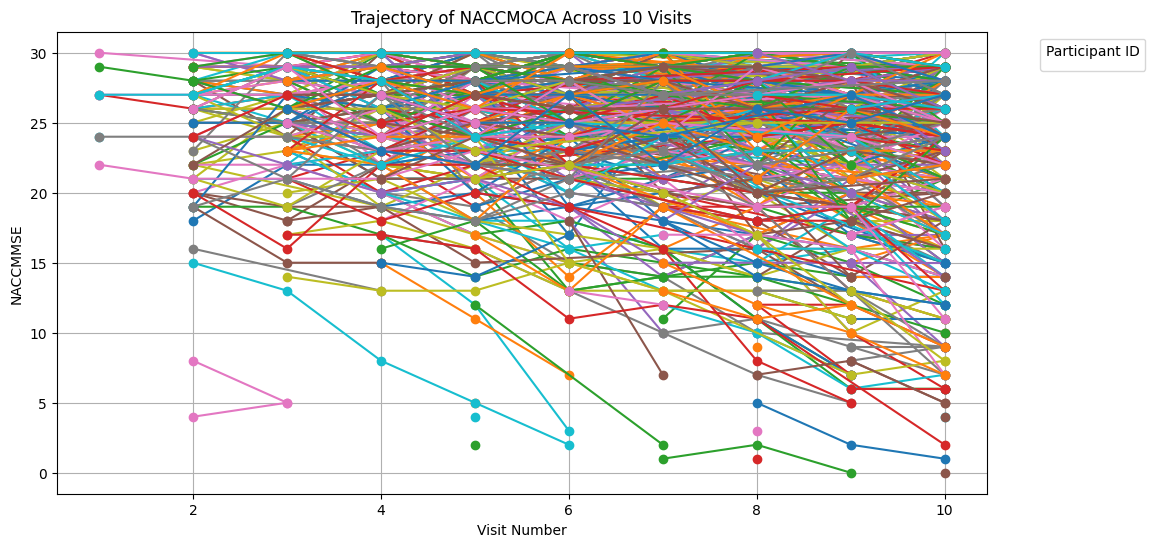

In [10]:

df = pd.read_csv('10_visits.csv')

id = 'NACCID'
num_visits = 'NACCVNUM'
nacc_moca_score = 'NACCMOCA'


df_filtered = df[(df[nacc_moca_score] >= 0) & (df[nacc_moca_score] <= 30) ]
df_with_10_visits = df_filtered.sort_values(by=[id, num_visits])

plt.figure(figsize=(12, 6))
for participant_id in ids_with_10_visits:
    participant_data = df_with_10_visits[df_with_10_visits[id] == participant_id]
    plt.plot(participant_data[num_visits], participant_data[nacc_moca_score], marker='o')

plt.xlabel('Visit Number')
plt.ylabel('NACCMMSE')
plt.title('Trajectory of NACCMOCA Across 10 Visits')
plt.legend(title='Participant ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
